<h1>Chapter 02. End-to-End Machine Learning Project</h1>

In this chapter, an example project will be worked through from end to end, with the perspective of being a newly hired data scientist at a real estate company. Although this example is fictitious, the main steps of a machine learning project will be illustrated, rather than focusing on learning about the real estate business. The following steps will be covered:
- The data will be obtained.
- The data will be explored and visualized to gain insights.
- The data will be prepared for machine learning algorithms.
- A model will be selected and trained.
- The model will be fine-tuned.
- The solution will be presented.
- The system will be launched, monitored, and maintained.

<h2>Get the Data</h2>

<h3>Download the Data</h3>

In [1]:
import pandas as pd

housing = pd.read_csv('./datasets/housing.csv')

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h3>Take a Quick Look at the Data</h3>

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The `describe()` method shows a summary of the numerical attributes. 

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


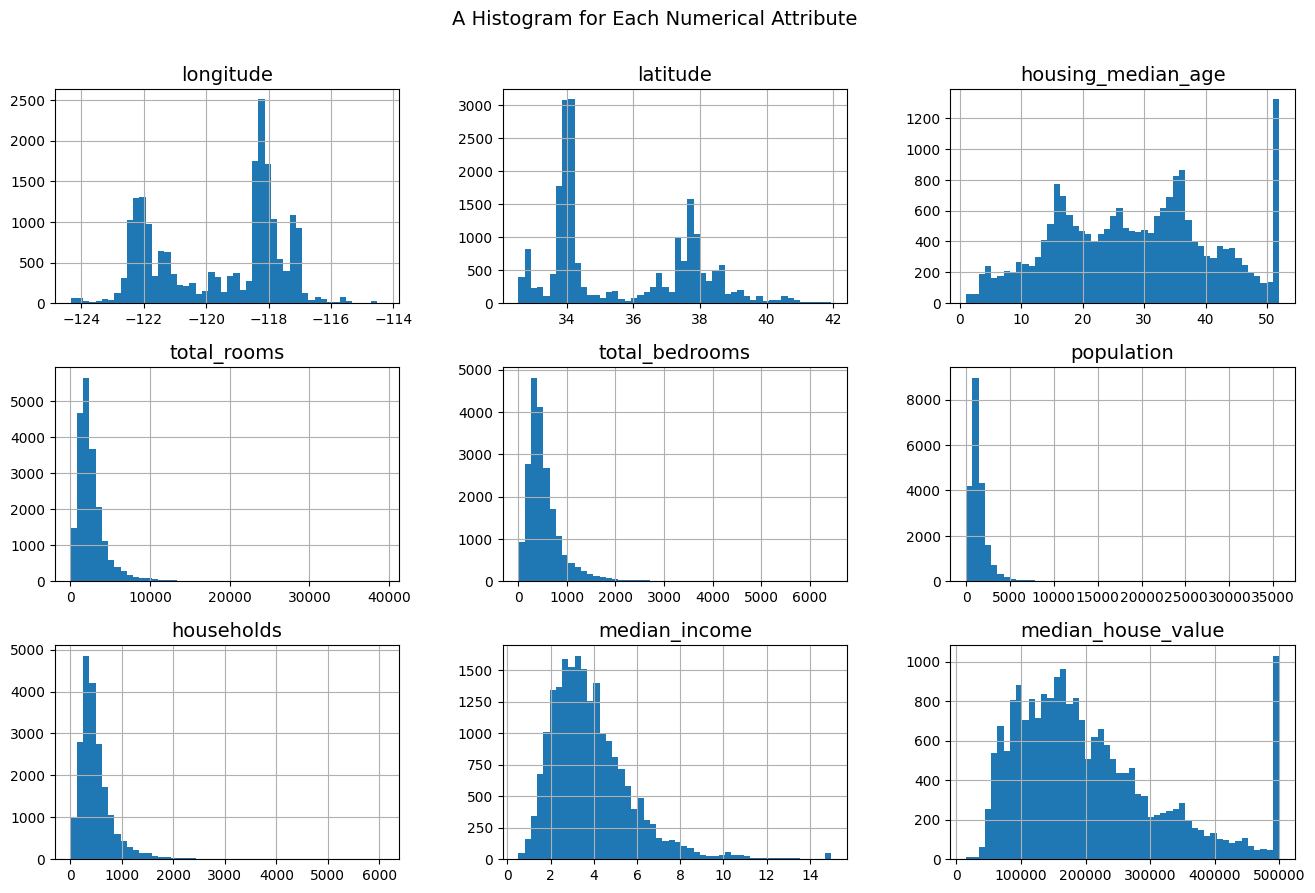

In [5]:
import matplotlib.pyplot as plt

# Define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(16, 10))
plt.figtext(
    0.5,
    0.95,
    'A Histogram for Each Numerical Attribute',
    ha='center',
    va='center',
    fontsize=14,
)
plt.show()

<h3>Create a Test Set</h3>

Creating a test set is theoretically simple; pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [6]:
import numpy as np


def shuffle_and_split_data(data, test_ratio):
    # Shuffle the indicies of the dataset
    shuffled_indicies = np.random.permutation(len(data))

    # Calculate the size of the test set based on the test_ratio
    test_set_size = int(len(data) * test_ratio)

    # Split the shuffled indicies into test and training sets
    test_indices = shuffled_indicies[:test_set_size]
    train_indices = shuffled_indicies[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = shuffle_and_split_data(data=housing, test_ratio=0.2)
len(train_set)

16512

In [8]:
len(test_set)

4128

Set the random seed to make sure that this notebook will remain the same outputs each time it is run.

In [9]:
np.random.seed(42)

The `train_test_split()` function from Scikit-learn is used to split a dataset into training and testing sets. It divides the data into two (or more) subsets, making it easy to train models on one part of the data and evaluate them on another. The `random_state` argument ensures reproducibility by controlling the shuffling of data during the split.

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

It has been suggested that median income is a crucial attribute for predicting median housing prices. Therefore, it should be ensured that the test set is representative of the various income categories in the entire dataset.

`pd.cut()` is used to segment and sort data values into discrete bins or intervals. It is useful for converting continuous data into categorical data by dividing it into specified ranges.

In [13]:
housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)

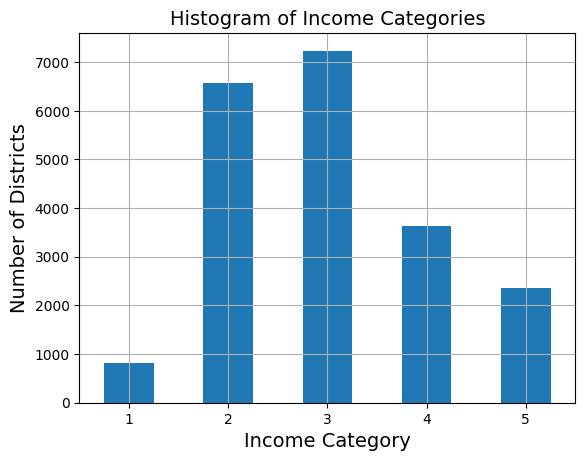

In [14]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.title('Histogram of Income Categories')
plt.show()

`StratifiedShuffleSplit` is a cross-validator in Scikit-learn that splits data into training and testing sets while preserving the proportion of each class or category, ensuring that the split is representative of the overall distribution.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

Since stratified sampling is common, a shorter method to obtain a single split can be used by applying the `train_test_split()` function with the `stratify` argument.

In [16]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing['income_cat'], random_state=42
)

Sampling bias comparison of stratified versus purely random sampling

In [17]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame(
    {
        'Overall %': income_cat_proportions(housing),
        'Stratified %': income_cat_proportions(strat_test_set),
        'Random %': income_cat_proportions(test_set),
    }
).sort_index()
compare_props.index.name = 'Income Category'
compare_props['Strat. Error %'] = (
    compare_props['Stratified %'] / compare_props['Overall %'] - 1
)
compare_props['Rand. Error %'] = (
    compare_props['Random %'] / compare_props['Overall %'] - 1
)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


The `income_cat` column can be dropped to revert the data to its original state

In [18]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

<h2>Explore and Visualize the Data to Gain Insights</h2>

In [19]:
housing = strat_train_set.copy()

<h3>Visualizing Geographical Data</h3>

The dataset contains geographical information, including latitude and longitude. It is advisable to create a scatterplot of all the districts to effectively visualize the data.

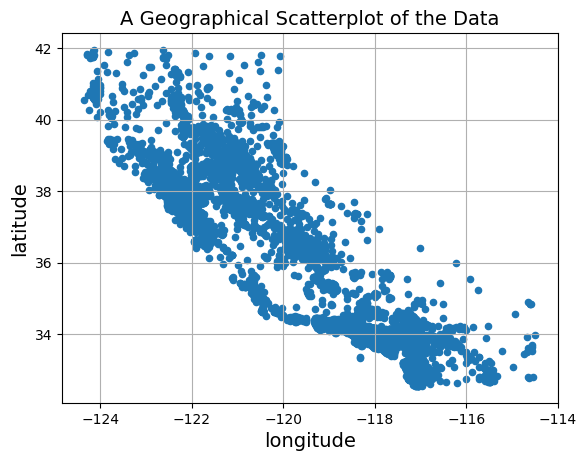

In [20]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    grid=True,
    title='A Geographical Scatterplot of the Data',
)
plt.show()

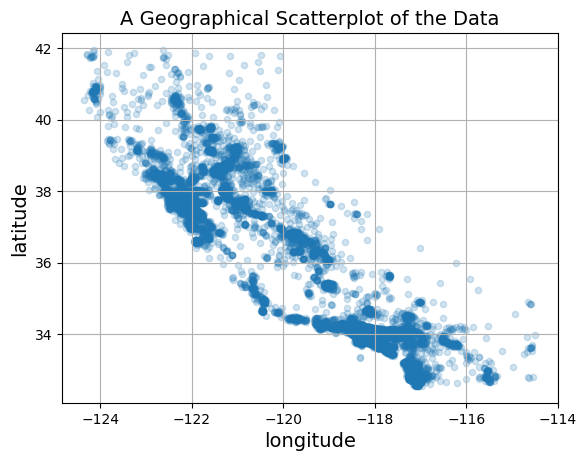

In [21]:
housing.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    grid=True,
    alpha=0.2,  # set for clearer high-density areas
    title='A Geographical Scatterplot of the Data',
)
plt.show()

The next cell creates an enhanced version of the previous figure by adding a California image in the background, renaming the label, and removing the grid. The radius of each circle represents the district's population, as specified by the `s` option.

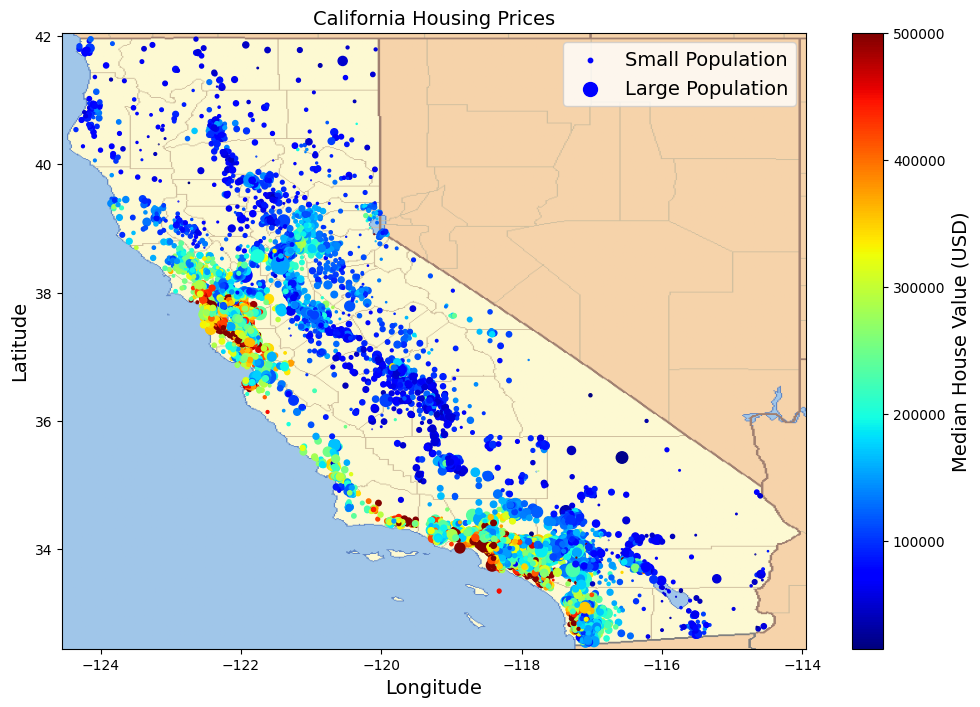

In [22]:
housing_renamed = housing.rename(
    columns={
        'latitude': 'Latitude',
        'longitude': 'Longitude',
        'population': 'Population',
        'median_house_value': 'Median House Value (USD)',
    }
)

housing_renamed.plot(
    figsize=(12, 8),
    kind='scatter',
    x='Longitude',
    y='Latitude',
    s=housing_renamed['Population'] / 100,
    c='Median House Value (USD)',
    cmap='jet',
    colorbar=True,
    sharex=False,
    title='California Housing Prices',
)

# Customize the legend for population size
plt.legend(
    handles=[
        plt.scatter([], [], s=10, facecolor='blue', label='Small Population'),
        plt.scatter([], [], s=100, facecolor='blue', label='Large Population'),
    ],
    scatterpoints=1,
    frameon=True,
)

axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(plt.imread('./images/california.png'), extent=axis, aspect='auto')
plt.show()

<h3>Looking for Correlations</h3>

`corr()` computes the pairwise correlation coefficients between columns in a DataFrame, measuring the strength and direction of their linear relationships.

In [23]:
corr_matrix = housing.corr(numeric_only=True)

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use the Pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute. This scatter matrix plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute’s values on the main diagonal (top left to bottom right)

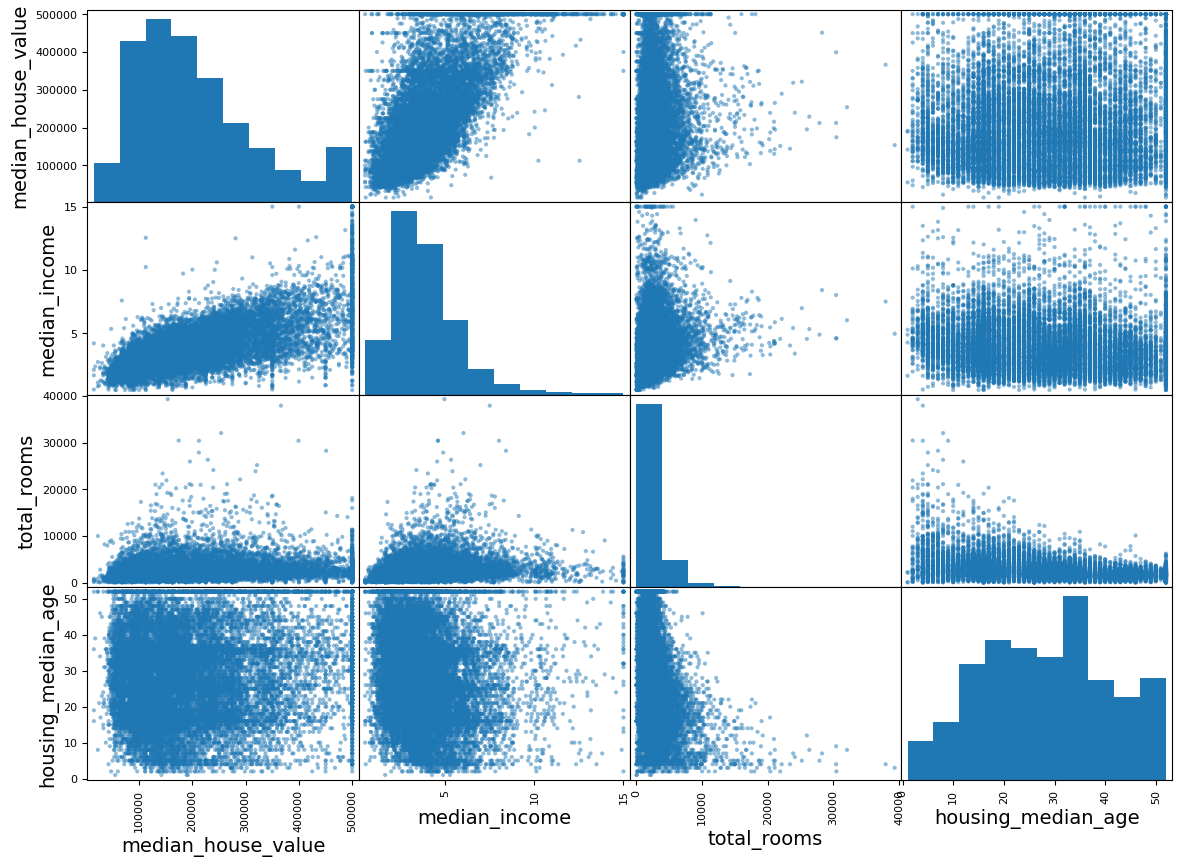

In [25]:
from pandas.plotting import scatter_matrix

attributes = [
    'median_house_value',
    'median_income',
    'total_rooms',
    'housing_median_age',
]
scatter_matrix(housing[attributes], figsize=(14, 10))
plt.show()

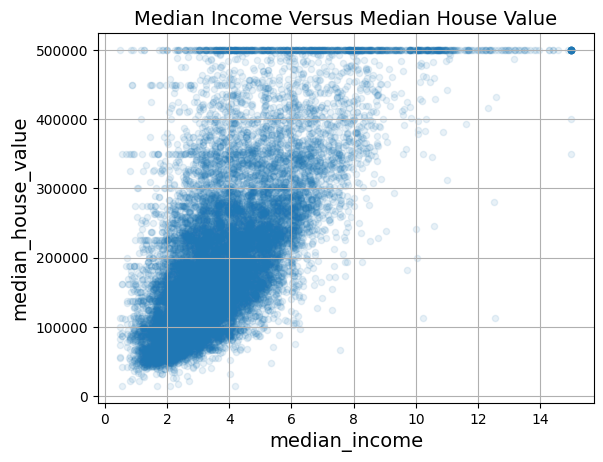

In [26]:
housing.plot(
    kind='scatter',
    x='median_income',
    y='median_house_value',
    alpha=0.1,
    grid=True,
    title='Median Income Versus Median House Value'
)
plt.show()

<h3>Experiment with Attribute Combinations</h3>

In [27]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [28]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64